In [15]:
import numpy as np
import os

In [2]:
from data_files import get_multi_data_files

In [16]:
dir_path = os.path.join("/", "data", "km3net", "reco_files_fitinf")

In [17]:
numu_filep = "km3_v4_numuCC_{}.evt.reco_fitinf.npz"

In [19]:
n_files =100

In [73]:
reco_files_fitinf_numu = [os.path.join(dir_path, numu_filep.format(i + 1))
                     for i in range(n_files)]

In [80]:
np.load(reco_files_fitinf_numu[0]).keys()

['beta0', 'E', 'dirz', 'diry', 'dirx', 'lik', 'posz', 'posx', 'posy', 'ren']

In [82]:
multi_data_files = get_multi_data_files("/data/km3net/Xy_multi_data_files/", merge=False, n_files=100)[0]

In [83]:
np.load(multi_data_files[0]).keys()

['E', 'dirz', 'diry', 'dirx', 'posz', 'posx', 'posy', 'y', 'x', 'dist']

In [76]:
doms_map_files_numu = ["/data/km3net/Xy_multi_data_files/numu_{}_sel5_doms_map.npz".format(i+1) for i in range(100)] 

In [77]:
lik = np.load(reco_files_fitinf_numu[0])["lik"][np.load(doms_map_files_numu[0])["id"]]
beta = np.load(reco_files_fitinf_numu[0])["beta0"][np.load(doms_map_files_numu[0])["id"]]

In [78]:
best = np.where(np.logical_and(-lik>60, -np.log10(beta)>2.8 ))[0]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [81]:
reco_E_best = np.log10(np.load(reco_files_fitinf_numu[0])["E"])[best]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [84]:
E_true = np.log10(np.load(multi_data_files[0])["E"][best])

In [85]:
import matplotlib.pyplot as plt

In [86]:
%matplotlib inline

(2, 8)

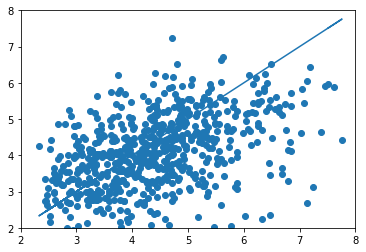

In [95]:
plt.scatter(E_true, reco_E_best)
plt.plot(E_true,E_true)
plt.xlim(2,8)
plt.ylim(2,8)

In [90]:
def correct_energy(x):
     return ((((((x<=1.0)*x)+(((x>1.0)and(x<=2.8))*(-(7.20045)+(x*3.01))))+(((x>2.8)and(x<=3.5))*(1081.22+(x*(-(1336.46)+(x*(614.871+(x*(-(124.755)+(x*9.43893))))))))))+(((x>3.5)and(x<=4.0))*(-(60.3619)+(x*(45.7012+(x*(-(11.0884)+(x*0.923034))))))))+(((x>4.0)and(x<7.0))*(-(8.72485)+(x*(5.16495+(x*(-(0.174627)+(x*(-(0.198979)+(x*(0.0385912+(x*-(0.00213019)))))))))))))+((x>7.0)*(0.375618+(x*1.01931)))

In [91]:
v_correct_energy = np.vectorize(correct_energy)

In [92]:
reco_corrected_best = v_correct_energy(reco_E_best)

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:2815: RuntimeWarning: invalid value encountered in correct_energy (vectorized)
  outputs = ufunc(*inputs)


(2, 8)

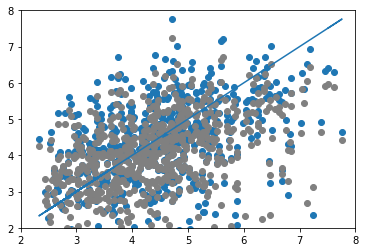

In [97]:
plt.scatter(E_true, reco_corrected_best)
plt.scatter(E_true, reco_E_best,c="gray")
plt.plot(E_true,E_true)
plt.xlim(2,8)
plt.ylim(2,8)